# 1.관련 패키지 설치하기

In [1]:
!pip install kiwipiepy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install wordcloud
!pip install Pillow --upgrade
!pip install numpy
!pip install xlrd
!pip install openpyxl
!pip install pandas
!pip install nltk

# 2.단어 온톨로지 사전 불러오기

In [2]:
import pandas as pd
df_dic = pd.read_excel('./data/ontology/ontology.xlsx')
# C:\Users\채가은\Downloads\BDA2023\BDA2023\data\ontology
print(df_dic[:100])

    단어 클래스
0   강의  강의
1   수업  강의
2   내용  강의
3   교양  강의
4   재밌  강의
..  ..  ..
95  과제  과제
96  대체  과제
97  발표  과제
98  팀플  과제
99  제출  과제

[100 rows x 2 columns]


In [3]:
from kiwipiepy import Kiwi

kiwi = Kiwi()
wordList = df_dic.loc[:,["단어"]]
wordType = set()

wordsPOS = []
for i in range(0,len(wordList)):
    classWords = str(df_dic.loc[i,"클래스"])
    wordType.add(str(classWords))
    target = wordList.iloc[i,0]
    posTagout = kiwi.tokenize(target)
    # print(posTagout)
    wordPOS = ""
    for eachOut in posTagout:
        result = eachOut[0]+"/"+eachOut[1]
        wordPOS = result
        break
    wordPOS = wordPOS.strip()
    wordsPOS.append(wordPOS)
print(wordsPOS[:10])
print(wordType)

['강의/NNG', '수업/NNG', '내용/NNG', '교양/NNG', '재밌/VA', '과목/NNG', '학기/NNG', '추천/NNG', '사람/NNG', '배우/NNG']
{'성적', '강의', '교수', '과제', '시험'}


In [4]:
df_dic['품사태깅'] = wordsPOS
classWords = list(wordType)
print(df_dic[:100])
print(classWords)

    단어 클래스    품사태깅
0   강의  강의  강의/NNG
1   수업  강의  수업/NNG
2   내용  강의  내용/NNG
3   교양  강의  교양/NNG
4   재밌  강의   재밌/VA
..  ..  ..     ...
95  과제  과제  과제/NNG
96  대체  과제  대체/MAG
97  발표  과제  발표/NNG
98  팀플  과제  팀플/NNG
99  제출  과제  제출/NNG

[100 rows x 3 columns]
['성적', '강의', '교수', '과제', '시험']


In [5]:
#감정들이 가지고 있는 단어 목록 확인하기
ontologyDic = {}
for eachClass in classWords:
    ontologyDic[eachClass] = list(df_dic[df_dic.클래스==eachClass]['품사태깅'])
    print(eachClass)
    print(list(df_dic[df_dic.클래스==eachClass]['품사태깅']))
print(ontologyDic)

성적
['성적/NNG', '학점/NNG', '점수/NNG', '점/NNG', '평가/NNG', '기준/NNG', '너그럽/VA-I', '만점/NNG', '평/NNG', '비율/NNG', '에/IC', '채점/NNG', '짜/VV', '결과/NNG', '가산점/NNG', '비쁠/NNG', '공고/NNG', '평균/NNG']
강의
['강의/NNG', '수업/NNG', '내용/NNG', '교양/NNG', '재밌/VA', '과목/NNG', '학기/NNG', '추천/NNG', '사람/NNG', '배우/NNG', '모르/VV', '관심/NNG', '이해/NNG', '꿀/NNG', '본인/NNG', '수강/NNG', '흥미/NNG', '자신/NNG', '재미있/VA', '역사/NNG', '철학/NNG', '괜찮/VA', '지식/NNG', '신청/NNG', '좋아하/VV', '만족/NNG', '도움/NNG', '전공/NNG', '대학/NNG', '최고/NNG', '문학/NNG', '계절/NNG', '인생/NNG', '아쉽/VA-I', '관점/NNG', '걱정/NNG', '단점/NNG', '빡세/VA', '학교/NNG', '피하/NNG', '졸업/NNG', '인정/NNG', '아주대/NNP', '수학/NNG', '이과/NNG', '온라인/NNG', '아깝/VA-I', '싫/VA', '미술/NNG', '기회/NNG', '필수/NNG', '추가/NNG', '지각/NNG', '줌/MAG', '정치/NNG', '장점/NNG', '언어/NNG', '새롭/VA-I', '문과/NNG', '따라가/VV', '고전/NNG', '고등학교/NNG', '학습/NNG', '학문/NNG', '싫어하/VV', '스트레스/NNG', '분야/NNG', '논술/NNG', '경제/NNG', '가볍/VA-I', '진도/NNG', '지루하/VA', '중국/NNP', '예술/NNG', '영어/NNP', '영교/NNP', '연구/NNG']
교수
['교수/NNG', '말/NNG', '친절/NNG', '질문/NNG', 

In [6]:
#단어-감정 사전 만들기
wordOntologyDic = {}
for i in range(0,len(df_dic)):
    wordOntologyDic[df_dic.loc[i,"품사태깅"]] = df_dic.loc[i,"클래스"]
print(wordOntologyDic)

{'강의/NNG': '강의', '수업/NNG': '강의', '내용/NNG': '강의', '교양/NNG': '강의', '재밌/VA': '강의', '과목/NNG': '강의', '학기/NNG': '강의', '추천/NNG': '강의', '사람/NNG': '강의', '배우/NNG': '강의', '모르/VV': '강의', '관심/NNG': '강의', '이해/NNG': '강의', '꿀/NNG': '강의', '본인/NNG': '강의', '수강/NNG': '강의', '흥미/NNG': '강의', '자신/NNG': '강의', '재미있/VA': '강의', '역사/NNG': '강의', '철학/NNG': '강의', '괜찮/VA': '강의', '지식/NNG': '강의', '신청/NNG': '강의', '좋아하/VV': '강의', '만족/NNG': '강의', '도움/NNG': '강의', '전공/NNG': '강의', '대학/NNG': '강의', '최고/NNG': '강의', '문학/NNG': '강의', '계절/NNG': '강의', '인생/NNG': '강의', '아쉽/VA-I': '강의', '관점/NNG': '강의', '걱정/NNG': '강의', '단점/NNG': '강의', '빡세/VA': '강의', '학교/NNG': '강의', '피하/NNG': '강의', '졸업/NNG': '강의', '인정/NNG': '강의', '아주대/NNP': '강의', '수학/NNG': '강의', '이과/NNG': '강의', '온라인/NNG': '강의', '아깝/VA-I': '강의', '싫/VA': '강의', '미술/NNG': '강의', '기회/NNG': '강의', '필수/NNG': '강의', '추가/NNG': '강의', '지각/NNG': '강의', '줌/MAG': '강의', '정치/NNG': '강의', '장점/NNG': '강의', '언어/NNG': '강의', '새롭/VA-I': '강의', '문과/NNG': '강의', '따라가/VV': '교수', '고전/NNG': '강의', '고등학교/NNG': '강의', '학습/NNG'

# 3. 말뭉치 데이터 불러오기

In [7]:
# 데이터 불러오기
import re

fileDir = "./data/Humanities_2.txt"
fr = open(fileDir, 'rt', encoding='UTF8')
contents = fr.readlines()
fr.close()

reviewList = []
for content in contents:
    content = re.sub('[^가-힣]', ' ', content).replace("\n","")
    content = re.sub('[\s]+', ' ', content).strip()
    if content == "" or content == " ":
        pass
    else:
        reviewList.append(content)

for eachReview in reviewList:
    print(eachReview)

연극에 관심이 없어도 재미있게 들었던 수업이었어요
내용이 비교적 많지만 재미있게 들을 수 있어요
진짜 재밌는 수업 진짜 교양다운 교양 시험아 어렵다고 하지만 애초에 교양이여도 공부는 해야한다고 생각해서 그렇게 어렵다고도 생각안함 난 열심히해서 기말 등함
대학와서 들었던 모든 교양수업중에 가장 배워가는 것도 많고 도움도 많이 되었습니다 물론 시험이 정말 쉬운건 아니지만 그래도 열심히 공부한 보람이 있어요 성적도 빨리나오고 비율도 다 채워주셔서 좋았습니다 강의력도 정말 좋으세요
딕션 좋으시고 수업에 확 몰입이 됩니다 잠깐잠깐 자료화면으로 연극 보여주면서 자체 쉬는시간이 있어서 듣기 편했습니다
공부량이 많다고 생각할 수도 있는데 시험도 평이하고 교수님 강의력이 미쳣음 추천
교수님이 이 분야에 정말 애정을 가지고 학생들도 관심을 가졌으면 하시는게 느껴짐 강의력 진짜 좋으시고 자료 적절히 활용 잘하심 학생들 배려도 해주심 호명을 하지만 교수님이 학생들 이름 외우려고 하시는거라 실제 출결은 전자출석이긴한데 이름을 외우시니까 그냥 출석해야함 연극 기획 또는 관람 과제가 하나 있는데 둘 중 하나라 부담 적고 연극 관람 추천 리스트 엄청 꼼꼼하게 극장의 의자가 불편한 것 까지 써주셔서 신경써주시는게 느껴짐 대학교 교양다운 수업이라 계절학기 수강료 따로 내도 아깝지 않았음
연극을 사랑하게 만드는 강의 무언가를 사랑하는 사람이 강의하는 내용은 언제나 즐겁다 시험은 빈칸 서술형 문제는 교수님이 강의하신 내용들 중에서 나오니까 만 가지고 벼락치기하려고하면 피본다
수업을 잘들어야 문제를 풀든 말든 합니다 교수님도 좋고 강의도 좋고 다 좋은데 시험이 어려워요
과제도 후반부에 큰 것만 하나 있어서 좋습니다 시험 문제의 경우 암기할께 많고 자신의 생각을 쓰는 문제가 많지먼 수업을 열심히 들었다면 성적 받기는 수월할 것 같습니다
일단 수업 자체가 너무 재밌어요 연극 관련 예술 관심 있으신 분이면 꼭 들어보시는 거 추천합니다 시험은 어렵다면 어려울 수 있는데 팁은 객관식 주관식 보다 논술형을 

In [8]:
from kiwipiepy import Kiwi
import re

kiwi = Kiwi()
#품사태깅된 문장
reviewPOSList = []
#단어의 타입 확인
wordType = set()
sentencePOSAll = []
sentencePOSContent = []
sentencePOSTextAll = ""


for eachReview in reviewList:
    #띄어쓰기
    eachReviewSpace = kiwi.space(eachReview)
    #문장 분할
    eachReviewSpaceSentences = kiwi.split_into_sents(eachReviewSpace)
    for sentence in eachReviewSpaceSentences:
        content = sentence.text
        #품사태깅
        posTagout = kiwi.tokenize(content)
        sentencePOS = ''
        for eachOut in posTagout:
            if "VV" in eachOut[1] or "VA" in eachOut[1] or "NN" in eachOut[1] or "MA" in eachOut[1]:
                resultContent = eachOut[0] + "/" + eachOut[1]
                sentencePOSContent.append(resultContent)
                
                result = eachOut[0] + "/" + eachOut[1]
            sentencePOS = sentencePOS + " " + result
            sentencePOSAll.append(result)
            if result != "":
                wordType.add(result)
            sentencePOSTextAll = sentencePOSTextAll + " " + eachOut[0]
        sentencePOS = sentencePOS.strip()
#         sentencePOSAll = sentencePOSAll + " " + sentencePOS
        reviewPOSList.append(sentencePOS)

sentencePOSTextAll = sentencePOSTextAll.strip()

print(sentencePOSContent[:20])
print(sentencePOSAll[:20])
print(wordType)
print(len(wordType))
print(reviewPOSList[:10])
print(len(reviewPOSList))

['연극/NNG', '관심/NNG', '없/VA', '재미있/VA', '듣/VV-I', '수업/NNG', '내용/NNG', '비교적/MAG', '많/VA', '재미있/VA', '듣/VV-I', '수/NNB', '있/VA', '진짜/MAG', '재밌/VA', '수업/NNG', '진짜/MAG', '교양/NNG', '교양/NNG', '시험/NNG']
['연극/NNG', '연극/NNG', '관심/NNG', '관심/NNG', '없/VA', '없/VA', '재미있/VA', '재미있/VA', '듣/VV-I', '듣/VV-I', '듣/VV-I', '수업/NNG', '수업/NNG', '수업/NNG', '수업/NNG', '내용/NNG', '내용/NNG', '비교적/MAG', '많/VA', '많/VA']
{'과/NNG', '왁벽/NNG', '전출/NNG', '바람/NNG', '번하/VA', '뺏기/VV', '접속/NNG', '애호가/NNG', '중반기/NNG', '깍/MAG', '비하/VV', '꾸준히/MAG', '에타/NNP', '장/NNB', '시청/NNG', '시키/VV', '및/MAG', '싸강/NNG', '사실/NNG', '쁠/NNG', '벌써/MAG', '마감일/NNG', '찡찡이/NNG', '대수/NNG', '상세히/MAG', '올라오/VV', '언급/NNG', '대하/VV', '뒤죽박죽/NNG', '철저히/MAG', '물론/NNG', '앞서/VV', '촬영/NNG', '진심/NNG', '짓/NNB', '적/VV', '피/NNG', '내리/VV', '자세히/MAG', '우려먹/VV', '일주일/NNG', '늦/VV', '되/VV', '그리/VV', '부정행위/NNG', '멍/NNG', '핑계/NNG', '심하/VA', '편의/NNG', '방면/NNG', '밤새/VV', '엄격/NNG', '여리/VA', '외/NNB', '실제/NNG', '빼먹/VV', '감추/VV', '향상/NNG', '재미있/VA', '드리/VV', '순도/NNG', '가르/VV', '전환/NNG'

# 4. 말뭉치 사용 빈도 기반 시각화 하기

## 4-1 전체 데이터 사용하기

<Axes: xlabel='n', ylabel='word'>

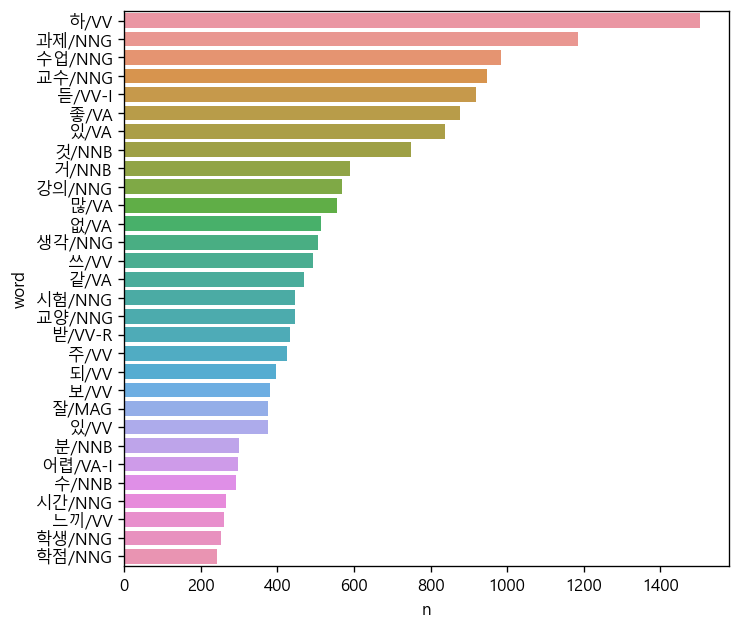

In [9]:
import pandas as pd
df_words = pd.DataFrame({'word':sentencePOSAll})

# 단어의 글자수 변수 추가하기
df_words['count'] = df_words['word'].str.len()

#글자수가 2이상인 단어들만 남기기
df_words = df_words.query('count >= 2')

#단어들의 등장 빈도수 확인하기
#단어 별로 분리하기
df_words = df_words.groupby('word', as_index = False)
#빈도 계산하기
df_words = df_words.agg(n=('word', 'count'))
#내림차수으로 정렬하기
df_words = df_words.sort_values('n', ascending = False)

top30 = df_words.head(30)

import seaborn as sns
import matplotlib.pyplot as plt

#plt.rcParams.update({'font.family':'NanumBarunGothic'})
plt.rcParams.update({'font.family':'Malgun Gothic'})
plt.rcParams.update({'figure.dpi':'120'})
plt.rcParams.update({'figure.figsize':[6.5,6]})

sns.barplot(data = top30, y = 'word', x = 'n')


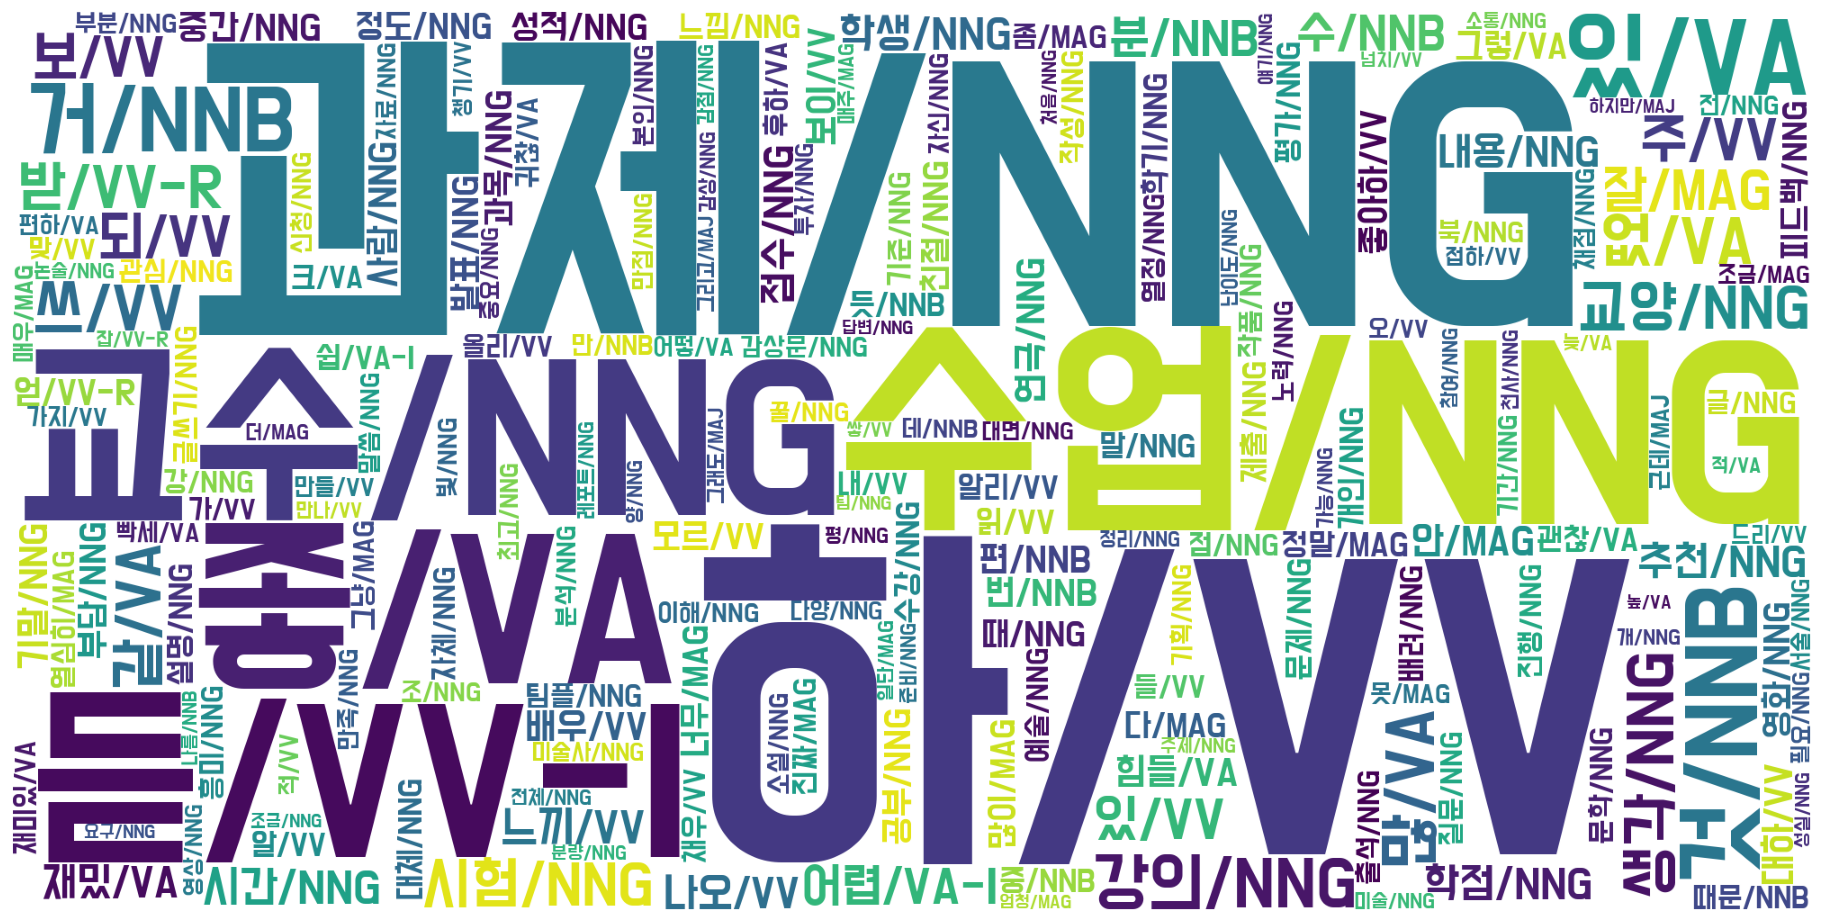

In [10]:
#현재의 데이터 딕셔너리로 변환하기
df_words_dic = df_words.set_index('word').to_dict()['n']

from wordcloud import WordCloud
from PIL import Image # 만약 "No module named 'PIL'" 에러가 발생하면 [ pip install Pillow==5.4.1 ] 로 라이브러리를 설치
import numpy as np
import matplotlib.pyplot as plt

#font = '/Users/seongminmun/opt/anaconda3/pkgs/notebook-6.4.5-py39hecd8cb5_0/lib/python3.9/site-packages/notebook/static/components/MathJax/fonts/DoHyeon-Regular.ttf'
font = './data/DoHyeon-Regular.ttf'
word_cloud = WordCloud(font_path = font,
                       width = 2000, height = 1000,
                       background_color='white')

word_cloud.generate_from_frequencies(df_words_dic)

plt.figure(figsize=(15,15))
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## 4-2 문맥 단어만 사용하기

<Axes: xlabel='n', ylabel='word'>

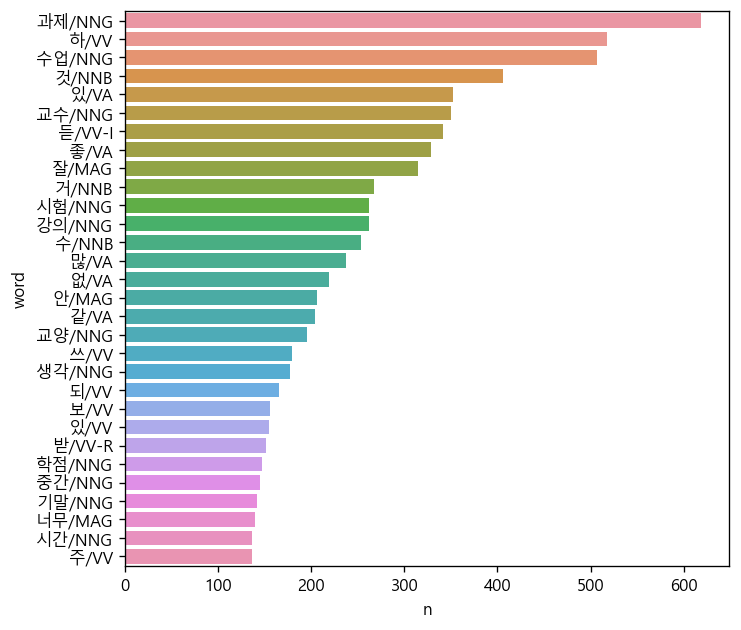

In [11]:
import pandas as pd
df_words = pd.DataFrame({'word':sentencePOSContent})

# 단어의 글자수 변수 추가하기
df_words['count'] = df_words['word'].str.len()

#글자수가 2이상인 단어들만 남기기
df_words = df_words.query('count >= 2')

#단어들의 등장 빈도수 확인하기
#단어 별로 분리하기
df_words = df_words.groupby('word', as_index = False)
#빈도 계산하기
df_words = df_words.agg(n=('word', 'count'))
#내림차수으로 정렬하기
df_words = df_words.sort_values('n', ascending = False)

top30 = df_words.head(30)

import seaborn as sns
import matplotlib.pyplot as plt

# plt.rcParams.update({'font.family':'NanumBarunGothic'})
plt.rcParams.update({'font.family':'Malgun Gothic'})
plt.rcParams.update({'figure.dpi':'120'})
plt.rcParams.update({'figure.figsize':[6.5,6]})

sns.barplot(data = top30, y = 'word', x = 'n')

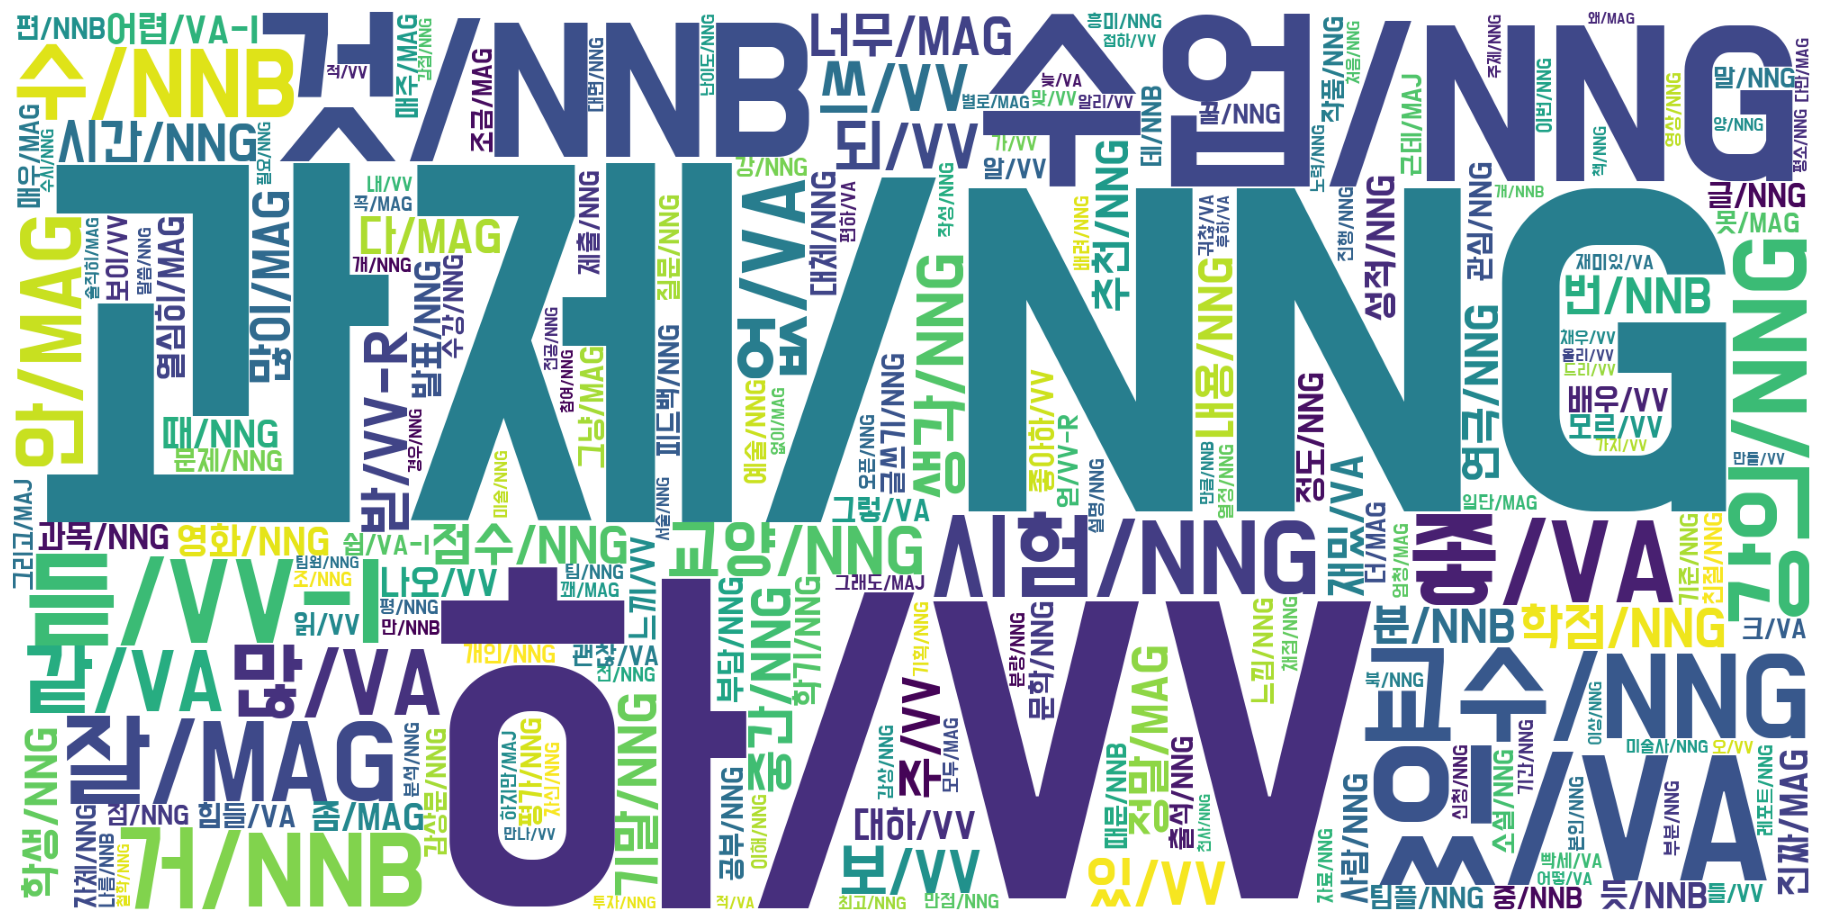

In [12]:
#현재의 데이터 딕셔너리로 변환하기
df_words_dic = df_words.set_index('word').to_dict()['n']

from wordcloud import WordCloud
from PIL import Image # 만약 "No module named 'PIL'" 에러가 발생하면 [ pip install Pillow==5.4.1 ] 로 라이브러리를 설치
import numpy as np
import matplotlib.pyplot as plt

#font = '/Users/seongminmun/opt/anaconda3/pkgs/notebook-6.4.5-py39hecd8cb5_0/lib/python3.9/site-packages/notebook/static/components/MathJax/fonts/DoHyeon-Regular.ttf'
font = './data/DoHyeon-Regular.ttf'
word_cloud = WordCloud(font_path = font,
                       width = 2000, height = 1000,
                       background_color='white')

word_cloud.generate_from_frequencies(df_words_dic)

plt.figure(figsize=(15,15))
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## 4-3 문맥 안에서 단어 사용 확인하기

In [13]:
from nltk import *
retokenize = RegexpTokenizer("[\w]+")
text = Text(retokenize.tokenize(sentencePOSTextAll))
text.concordance("강의")

Displaying 25 of 262 matches:
 도 빨리 나오 고 비율 도 다 채우 어 주 시 어서 좋 었 습니다 강의 력 도 정말 좋 으세요 딕션 좋 으시 고 수업 에 확 몰입 이 되 
많 다고 생각 하 ᆯ 수 도 있 는데 시험 도 평이 하 고 교수 님 강의 력 이 미치 엇 음 추천 교수 님 이 이 분야 에 정말 애정 을 가
생 들 도 관심 을 가지 었 으면 하 시 는 것 이 느끼 어 지 ᆷ 강의 력 진짜 좋 으시 고 자료 적절히 활용 잘 하 시 ᆷ 학생 들 배려
료 따로 내 어도 아깝 지 않 었 음 연극 을 사랑 하 게 만들 는 강의 무어 이 ᆫ가 를 사랑 하 는 사람 이 강의 하 는 내용 은 언제나
 사랑 하 게 만들 는 강의 무어 이 ᆫ가 를 사랑 하 는 사람 이 강의 하 는 내용 은 언제나 즐겁 다 시험 은 빈칸 서술 형 문제 는 교
용 은 언제나 즐겁 다 시험 은 빈칸 서술 형 문제 는 교수 님 이 강의 하 시 ᆫ 내용 들 중 에서 나오 니까 만 가지 고 벼락치기 하 려
 잘 듣 어야 문제 를 풀 든 말 든 하 ᆸ니다 교수 님 도 좋 고 강의 도 좋 고 다 좋 은데 시험 이 어렵 어요 과제 도 후반부 에 크 
ᆯ 수 있 어요 개인 적 으로 시험 은 어렵 었 습니다 정말 좋 은 강의 이 었 습니다 수업 시간 에 배우 는 연극 을 잠깐 씩 보이 어 주
 습니다 수업 시간 에 배우 는 연극 을 잠깐 씩 보이 어 주 면서 강의 하 시 기 때문 에 수업 에 집중 도 잘 되 고 학점 도 정말 잘 
기 도 하 ᆷ 학점 도 잘 받 어서 만족 스럽 었 던 수업 교수 님 강의 력 좋 으시 고 체계 적 이 ᆸ니다 시험 은 난이도 가 꽤 있 는 
ᆸ니다 연극 에 대하 어 잘 모르 더라 도 관심 이 있 다면 좋 은 강의 이 ᆸ니다 과제 는 연극 기획 감상 둘 중 하나 고르 어서 하 면 
시 었 고 과제 도 부담 없 고 연극 의 매력 을 알 ᆯ 수 있 는 강의 로 추천 하 ᆸ니다 공부 를 안 하 어서 성 적 은 기대 안 하 었
었 자 만 연극 을 처음 접하 어도 재밌

In [14]:
text.concordance("성적")

Displaying 25 of 88 matches:
 은 거 ᆫ 아니 지만 그래도 열심히 공부 하 ᆫ 보람 이 있 어요 성적 도 빨리 나오 고 비율 도 다 채우 어 주 시 어서 좋 었 습니다 
생각 을 쓰 는 문제 가 많 지 멀 ᆫ 수업 을 열심히 듣 었 다면 성적 받 기 는 수월 하 ᆯ 것 같 습니다 일단 수업 자체 가 너무 재밌
 었 어요 진짜 수업 시간 만 집중 하 어서 듣 으면 충분히 좋 은 성적 받 어 가 시 ᆯ 수 있 어요 추천 수업 이 정말 재밌 습니다 연극
 에서 꿀 강 은 당연 하 ᆫ 말 이 지만 열심히 공부 하 ᆫ 만큼 성적 나오 ᆸ니다 연극 에 대하 어 잘 모르 더라 도 관심 이 있 다면 
 하 시 어도 잘 주 시 ᆸ니다 진짜 좋 음 강의 흥미 가 없 으면 성적 은 잘 안 나오 ᆯ 수 있 다 나 가 그렇 었 다 수업 은 재밌 고
의 생각 을 논리 적 으로 펼치 ᆯ 수 있 는 사람 이 라면 좋 은 성적 얻 을 수 있 습니다 수업 내용 자체 는 딱 예술 교양 의 정석 이
속 잡 어 주 시 어서 교수 님 지시 대로 만 쭉 쫓아가 면 좋 은 성적 받 을 수 있 다 연극 문외한 이 고 공대 생 이 라 글 쓰 는 것
하 ᆷ 논술 형 이 었 던 시험 은 거의 말아먹 다시피 하 었 지만 성적 을 매우 후하 게 주 시 어서 만족 을 안 하 면 이상 하 ᆯ 지경
면 일단 정지 되 ᆷ 근데 답 은 정말 배우 ᆫ 내용 열심히 하 면 성적 도 그만큼 잘 나오 는 과목 연극 영상 도 자주 보이 어 주 시 어
교수 님 너무 친절 하 시 고 학생 들 배려 하 어 주 시 ᆷ 짱짱 성적 도 잘 주 시 ᆷ 간만에 듣 는 교양 답 은 교양 과목 이 었 습니
이 얼마나 이해 하 고 느끼 는지 가 중요 하 었 던 것 같 습니다 성적 은 생각 보다 잘 주 시 었 구 요 교양 답 은 교양 을 듣 고 싶
 푸 ᆯ 수 있 었 던 글쓰기 문제 들 이 었 습니다 결과 적 으로 성적 도 저 가 딱히 잘 하 ᆫ 거 ᆫ 아니 라 생각 하 는데 성적 도 
으로 성적 도 저 가 딱히 잘 하 ᆫ 거 

In [15]:
text.concordance("과제")

Displaying 25 of 618 matches:
 을 외우 시 니까 그냥 출석 하 어야 하 ᆷ 연극 기획 또는 관람 과제 가 하나 있 는데 둘 중 하나 이 라 부담 적 고 연극 관람 추천 
교수 님 도 좋 고 강의 도 좋 고 다 좋 은데 시험 이 어렵 어요 과제 도 후반부 에 크 ᆫ 것 만 하나 있 어서 좋 습니다 시험 문제 의
에 수업 에 집중 도 잘 되 고 학점 도 정말 잘 주 시 었 습니다 과제 는 연극 기획 감상 증 하나 선택 하 는 거 이 었 는데 연극 감상
업 연극 에 대하 어 많이 알 어 가 ᆯ 수 있 는 시간 이 었 고 과제 도 연극 기획 연극 감상 선택 이 라 연극 기획 하 었 는데 즐겁 
 도 나 의 맘대로 하 고 무대 구성 도 하 어 보 ᆯ 수 있 어서 과제 하 면서 도 나 가 연출가 가 되 ᆫ 것 처럼 고민 하 면서 구성 
대하 어 잘 모르 더라 도 관심 이 있 다면 좋 은 강의 이 ᆸ니다 과제 는 연극 기획 감상 둘 중 하나 고르 어서 하 면 되 고 시험 은 
부분 도 조금 나오 ᆸ니다 이번 학기 는 잘 채우 어 주 시 었 고 과제 도 부담 없 고 연극 의 매력 을 알 ᆯ 수 있 는 강의 로 추천 
있 었 다는 것 이 정말 감사 하 었 습니다 시험 은 다소 어렵 고 과제 도 쉽 은 난이도 는 아니 었 으나 얻 어 가 는 것 이 많 은 끝
절 학기 이 라 단기간 많 은 범위 를 외우 기 조금 힘들 었 어요 과제 는 배우 었 던 내용 이용 하 어서 기획 하 는 거 고르 었 는데 
찾 어서 풀 면 풀 만 하 었 음 참고 로 오픈 북 이 어서 이 ᆷ 과제 한 개 이 었 고 연극 감상 연극 기획 택 이 었 음 연극 보 ᆯ 
 에 는 시험 이 꼼꼼 하 게 나오 어서 하 ᆯ 수 밖에 없 었 음 과제 는 점수 잘 주 는 듯 근거 가 명확히 있 어서 좋 었 다며 만점 
 자체 는 딱 예술 교양 의 정석 이 라 부담 은 크 게 없 습니다 과제 는 연극 기획 감상문 작성 이 ᆫ데 기획 추천 하 ᆸ니다 최고 의 
연극 영상 도 보이 어 주 시 어서 지루

In [16]:
text.concordance("시험")

Displaying 25 of 262 matches:
 게 듣 을 수 있 어요 진짜 재밌 는 수업 진짜 교양 답 은 교양 시험 아 어렵 다고 하 지만 애초 에 교양 이 이 어도 공부 는 하 어야
장 배우 어 가 는 것 도 많 고 도움 도 많이 되 었 습니다 물론 시험 이 정말 쉽 은 거 ᆫ 아니 지만 그래도 열심히 공부 하 ᆫ 보람 
 편하 었 습니다 공부 량 이 많 다고 생각 하 ᆯ 수 도 있 는데 시험 도 평이 하 고 교수 님 강의 력 이 미치 엇 음 추천 교수 님 이
ᆫ가 를 사랑 하 는 사람 이 강의 하 는 내용 은 언제나 즐겁 다 시험 은 빈칸 서술 형 문제 는 교수 님 이 강의 하 시 ᆫ 내용 들 중
 말 든 하 ᆸ니다 교수 님 도 좋 고 강의 도 좋 고 다 좋 은데 시험 이 어렵 어요 과제 도 후반부 에 크 ᆫ 것 만 하나 있 어서 좋 
렵 어요 과제 도 후반부 에 크 ᆫ 것 만 하나 있 어서 좋 습니다 시험 문제 의 경우 암기 하 ᆯ께 많 고 자신 의 생각 을 쓰 는 문제 
심 있 으시 ᆫ 분 이 면 꼭 듣 어 보 시 는 거 추천 하 ᆸ니다 시험 은 어렵 다면 어렵 을 수 있 는 데 팁 은 객관식 주관식 보다 논
 에 관심 있 으시 ᆫ 분 들 은 꼭 듣 으시 기 ᆯ 추천 하 어요 시험 은 수업 을 꼭 듣 어야지 잘 보 ᆯ 수 있 어요 개인 적 으로 시
험 은 수업 을 꼭 듣 어야지 잘 보 ᆯ 수 있 어요 개인 적 으로 시험 은 어렵 었 습니다 정말 좋 은 강의 이 었 습니다 수업 시간 에 
하 는 거 이 었 는데 연극 감상 정말 값지 ᆫ 경험 이 었 습니다 시험 은 조금 어렵 게 나오 어서 공부 좀 열심히 하 어야 하 지만 학점
업 이 라는 거 솔직히 좀 힘들 기 ᆫ 하 었 음 졸 기 도 졸 고 시험 문제 는 피피티 에 없 고 교수 님 이 말 하 ᆫ 거 에서 많이 나
스럽 었 던 수업 교수 님 강의 력 좋 으시 고 체계 적 이 ᆸ니다 시험 은 난이도 가 꽤 있 는 편 이 고 수업 잘 듣 어야 하 어요 연극
듣 어야 하 어요 연극 의 매력 을 발견

In [17]:
text.concordance("교수")

Displaying 25 of 350 matches:
 량 이 많 다고 생각 하 ᆯ 수 도 있 는데 시험 도 평이 하 고 교수 님 강의 력 이 미치 엇 음 추천 교수 님 이 이 분야 에 정말 애
 는데 시험 도 평이 하 고 교수 님 강의 력 이 미치 엇 음 추천 교수 님 이 이 분야 에 정말 애정 을 가지 고 학생 들 도 관심 을 가
 잘 하 시 ᆷ 학생 들 배려 도 하 어 주 시 ᆷ 호명 을 하지만 교수 님 이 학생 들 이름 외우 려고 하 시 는 거 이 라 실제 출결 은
의 하 는 내용 은 언제나 즐겁 다 시험 은 빈칸 서술 형 문제 는 교수 님 이 강의 하 시 ᆫ 내용 들 중 에서 나오 니까 만 가지 고 벼
피 보 ᆫ다 수업 을 잘 듣 어야 문제 를 풀 든 말 든 하 ᆸ니다 교수 님 도 좋 고 강의 도 좋 고 다 좋 은데 시험 이 어렵 어요 과제
기 ᆫ 하 었 음 졸 기 도 졸 고 시험 문제 는 피피티 에 없 고 교수 님 이 말 하 ᆫ 거 에서 많이 나오 ᆷ 특히 원작 연극 별 다른 
문제 도 객관 주관 약술 서술 다 있 어서 좀 빡세 기 ᆫ 하 ᆫ데 교수 님 도 빡세 ᆫ 거 알 어서 점수 는 후 하 게 잘 주 시 는 듯 
 님 도 빡세 ᆫ 거 알 어서 점수 는 후 하 게 잘 주 시 는 듯 교수 님 진짜 좋 으시 고 학생 들 배려 엄청 하 어 주 시 ᆷ 이번 학
 주 시 기 도 하 ᆷ 학점 도 잘 받 어서 만족 스럽 었 던 수업 교수 님 강의 력 좋 으시 고 체계 적 이 ᆸ니다 시험 은 난이도 가 꽤
었 는데 상당히 좋 은 경험 이 었 음 그러나 시험 을 잘 보 려면 교수 님 이 하 시 는 말씀 다 적 어야 하 는데 아침 시 수업 이 라 
 ᆫ 척 하 ᆯ 수 있 음 얻 어 가 는 것 이 많 은 강의 이 고 교수 님 께서 설며 을 상세히 하 어 주 시 어서 좋 었 음 연극 에 대
 음 연극 에 대하 ᆫ 영상 자료 를 매번 준비 하 어 오 시 는데 교수 님 의 설명 을 듣 고 영상 자료 를 그 후 에 보 면 이해 가 잘
생각 을 주요 단어 를 포함 하 어 말 

# 5.문서 * 온톨로지 클래스 행렬 만들기

## term-document matrix (words-reviews matrix)
- Dan Jurafsky: https://web.stanford.edu/~jurafsky/
- CS124(From Languages to Information): https://www.youtube.com/channel/UC_48v322owNVtORXuMeRmpA
- (0:10): https://www.youtube.com/watch?v=xtD47WHNhxk&list=PLaZQkZp6WhWxIvz74aEvvVc99o7WuOoQ6&index=3

In [18]:
import pandas as pd
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))
# 0으로 이루어진 단어 행렬 생성 (초기값)
matrixCorpus = pd.DataFrame(0.0, index=classWords, columns=documentIndex)
print(matrixCorpus)

for i in range(0,len(reviewPOSList)):
    sentence = reviewPOSList[i]
    words = sentence.split(" ")
    # print(words)
    for j in range(0,len(words)):
        if words[j] != '':
            #리뷰에서 사용된 단어가 온톨로지에 존재하는 경우 카운트
            if words[j] in wordOntologyDic:
                matrixCorpus[str(i)][wordOntologyDic[words[j]]] += 1.0
            else:
                pass

print(matrixCorpus)

      0    1    2    3    4    5    6    7    8    9  ...  1838  1839  1840  \
성적  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
강의  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
교수  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
과제  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
시험  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   

    1841  1842  1843  1844  1845  1846  1847  
성적   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
강의   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
교수   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
과제   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
시험   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 1848 columns]
      0    1    2    3    4    5    6    7    8    9  ...  1838  1839  1840  \
성적  0.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
강의  8.0  4.0  9.0  0.0  5.0  0.0  3.0  2.0  0.0  3.0  ...   

## 행렬 정규화(TF-IDF) 적용하기 -  TF-IDF(Term Frequency-Inverse Document Frequency)

- Dan Jurafsky: https://web.stanford.edu/~jurafsky/
- CS124(From Languages to Information): https://www.youtube.com/channel/UC_48v322owNVtORXuMeRmpA
- (0:00 - 1:00, 5:00): https://www.youtube.com/watch?v=TBUpxFw8oIA&list=PLaZQkZp6WhWxIvz74aEvvVc99o7WuOoQ6&index=5

- tf(d,t) : 각 문서에서의 각 단어의 등장 빈도를 나타내는 값; 
- df(t) : 특정 단어 t가 등장한 문서의 수; 
- idf(d, t) : df(t)에 반비례하는 수; log(n/1+df(t))

In [19]:
import pandas as pd 
from math import log 

# N = len(reviewPOSList)
# matrix = matrixEmotion
# t = print(emotions)

def emotion_idf(t,N,matrix):
    df = 0
    for i in range(0,len(matrix.columns)):
        each = matrix.loc[:,str(i)]
        if each.loc[t] != 0.0:
            df += 1
    return log(N/(df+1))

def emotion_tfidf(t,N,matrix):
    df = 0
    for i in range(0,len(matrix.columns)):
        each = matrix.loc[:,str(i)]
        if each.loc[t] != 0.0:
            df += 1
    return log(N/(df+1))


In [20]:
outCome = []

for i in range(0, len(classWords)):
    target = classWords[i]
    outCome.append(emotion_idf(target, len(reviewPOSList), matrixCorpus))

class_idf_out = pd.DataFrame(outCome, index=classWords, columns=["IDF"])

tfidfTotal = []
for i in range(0, len(classWords)):
    tfidf = []
    for j in range(0,len(matrixCorpus.columns)):
        each = matrixCorpus.loc[:,str(j)]
        tfidf.append(float(each.loc[classWords[i]] * class_idf_out.loc[classWords[i]]))
    tfidfTotal.append(tfidf)

documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

corpus_tfidf_out = pd.DataFrame(tfidfTotal, index=classWords, columns = documentIndex)
print(corpus_tfidf_out)

C:\Users\채가은\AppData\Local\Temp\ipykernel_20368\3386013984.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  tfidf.append(float(each.loc[classWords[i]] * class_idf_out.loc[classWords[i]]))


           0         1         2         3         4         5         6  \
성적  0.000000  0.000000  0.000000  0.000000  0.000000  5.879080  0.000000   
강의  3.643138  1.821569  4.098531  0.000000  2.276961  0.000000  1.366177   
교수  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
과제  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
시험  0.000000  0.000000  3.696431  1.232144  0.000000  8.625006  0.000000   

           7    8         9  ...      1838      1839  1840      1841  \
성적  0.000000  0.0  0.000000  ...  0.000000  0.000000   0.0  0.000000   
강의  0.910785  0.0  1.366177  ...  4.098531  0.000000   0.0  1.821569   
교수  0.000000  0.0  2.543768  ...  0.000000  0.000000   0.0  0.000000   
과제  0.000000  0.0  0.000000  ...  2.011332  0.000000   0.0  0.000000   
시험  0.000000  0.0  7.392862  ...  0.000000  3.696431   0.0  0.000000   

        1842     1843      1844      1845    1846      1847  
성적  1.469770  2.93954  0.000000  0.000000  0.000

In [21]:
corpus_tfidf_out.to_csv("./data/Humanities_2_tfidf_out.csv")  

# 6. 온톨로지 그래프 생성

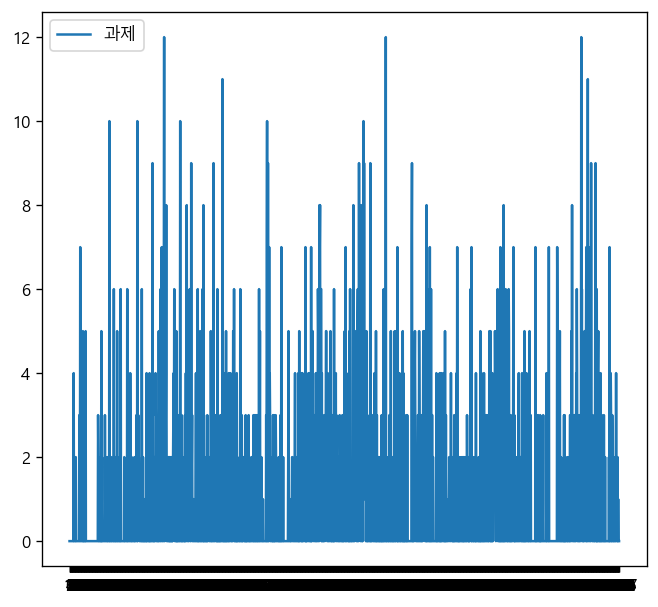

In [23]:
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))
    
targetWords = classWords
class1 = []
for i in range(0,len(documentIndex)):
    class1.append(int(corpus_tfidf_out[str(i)]['과제']))
    
#라인 그래프
#그래프로 표현하기
import matplotlib.pyplot as plt

# 배우
plt.plot(documentIndex, class1, label = '과제')
plt.legend()
plt.show()

<Axes: xlabel='words', ylabel='freq'>

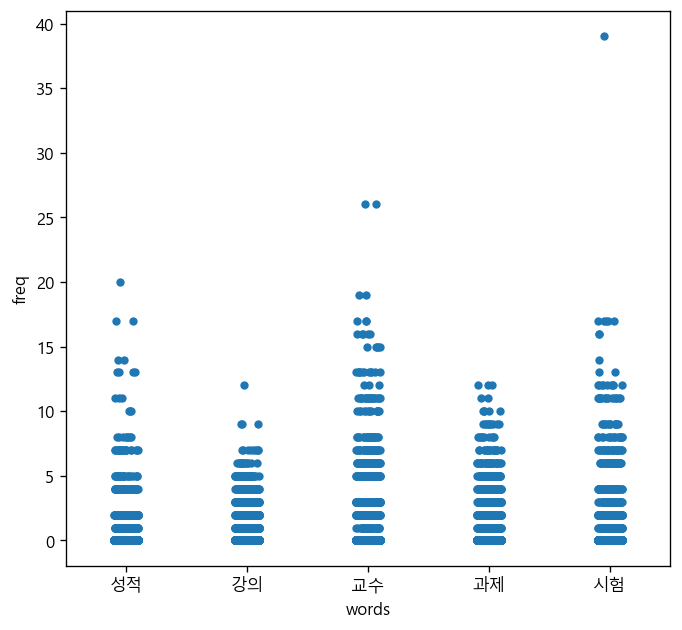

In [24]:
# 스트립 플롯 그리기
def dataRefinedForPlot(matrix, xIndex, listWords):
    import pandas as pd
    freq = []
    words = []
    for eachWord in listWords:
        for i in range(0,len(xIndex)):
            freq.append(int(matrix[str(i)][eachWord]))
            words.append(eachWord)
    refinedDF = pd.DataFrame({'words':words,'freq':freq})
    return refinedDF
  
inputDF = dataRefinedForPlot(corpus_tfidf_out, documentIndex, targetWords)

#스트립플롯은 데이터를 점으로 찍어 나타낸 그래프이다
import seaborn as sns
import matplotlib.pyplot as plt
# plt.rcParams.update({'font.family':'NanumBarunGothic'})
plt.rcParams.update({'font.family':'Malgun Gothic'})
plt.rcParams.update({'figure.dpi':'120'})
plt.rcParams.update({'figure.figsize':[6.5,6]})


sns.stripplot(x='words', y='freq', data=inputDF)

<Axes: xlabel='words', ylabel='freq'>

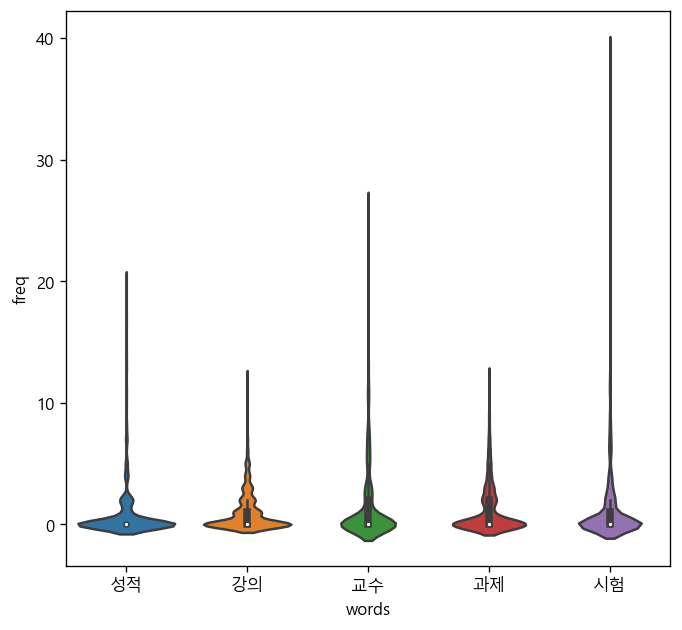

In [25]:
#바이올릿 차트
sns.violinplot(x='words', y='freq', data=inputDF)

<Axes: xlabel='words', ylabel='freq'>

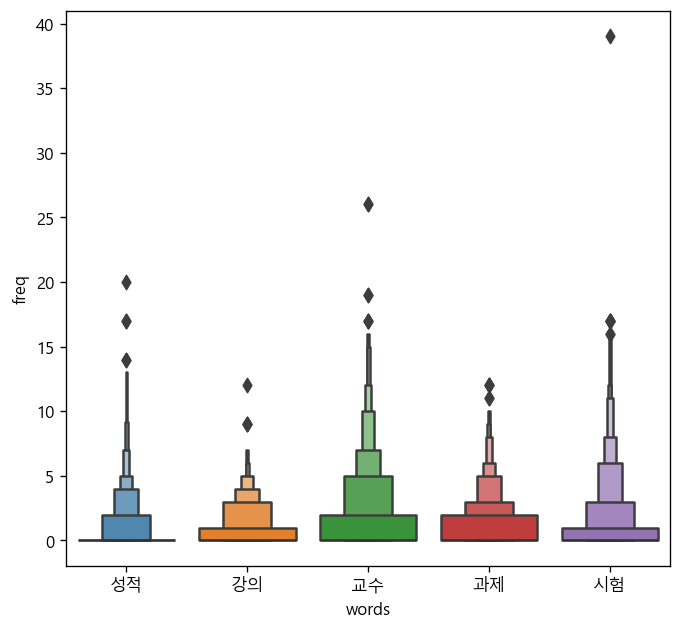

In [26]:
#박슨 플롯
sns.boxenplot(x='words', y='freq', data=inputDF)

# 7. 문서별로 온톨로지 정보 확인하기 (e.g., 영화별로 감정 트랜드 확인하기)

In [88]:
emotions = ['감동', '공포', '권태', '놀람', '분노', '불안', '사랑', '설렘', '섭섭', '성취', '수치', '슬픔', '심란', '연민', '열정', '우울', '재미', '정', '죄책', '질투', '평안', '행복', '혐오']
movies = ["도둑들","26년","광해왕이된남자","설국열차","신세계","은밀하게위대하게"]

movieDic = dict()

#도둑들-Thieves
Thieves_tfidf_matrix = pd.read_csv('./data/tfidf_도둑들_out.csv', index_col=0)
ThievesEmotionMean = []
for i in range(0, len(emotions)):
    ThievesEmotionMean.append(Thieves_tfidf_matrix.loc[emotions[i]].mean())
print(ThievesEmotionMean)
movieDic["도둑들"] = ThievesEmotionMean

#26년-years26
years26_tfidf_matrix = pd.read_csv('./data/tfidf_26년_out.csv', index_col=0)
years26EmotionMean = []
for i in range(0, len(emotions)):
    years26EmotionMean.append(years26_tfidf_matrix.loc[emotions[i]].mean())
print(years26EmotionMean)
movieDic["26년"] = years26EmotionMean

#광해왕이된남자-Gwanghea
Gwanghea_tfidf_matrix = pd.read_csv('./data/tfidf_광해왕이된남자_out.csv', index_col=0)
GwangheaEmotionMean = []
for i in range(0, len(emotions)):
    GwangheaEmotionMean.append(Gwanghea_tfidf_matrix.loc[emotions[i]].mean())
print(GwangheaEmotionMean)
movieDic["광해왕이된남자"] = GwangheaEmotionMean

#설국열차-SnowTrain
SnowTrain_tfidf_matrix = pd.read_csv('./data/tfidf_설국열차_out.csv', index_col=0)
SnowTrainEmotionMean = []
for i in range(0, len(emotions)):
    SnowTrainEmotionMean.append(SnowTrain_tfidf_matrix.loc[emotions[i]].mean())
print(SnowTrainEmotionMean)
movieDic["설국열차"] = SnowTrainEmotionMean

#신세계-NewWorld
NewWorld_tfidf_matrix = pd.read_csv('./data/tfidf_신세계_out.csv', index_col=0)
NewWorldEmotionMean = []
for i in range(0, len(emotions)):
    NewWorldEmotionMean.append(NewWorld_tfidf_matrix.loc[emotions[i]].mean())
print(NewWorldEmotionMean)
movieDic["신세계"] = NewWorldEmotionMean

#은밀하게위대하게-Secret
Secret_tfidf_matrix = pd.read_csv('./data/tfidf_은밀하게위대하게_out.csv', index_col=0)
SecretEmotionMean = []
for i in range(0, len(emotions)):
    SecretEmotionMean.append(Secret_tfidf_matrix.loc[emotions[i]].mean())
print(SecretEmotionMean)
movieDic["은밀하게위대하게"] = SecretEmotionMean

movieDF = pd.DataFrame(movieDic, index=emotions)
print(movieDF)

[0.08898815052536746, 0.09785228949442779, 0.13003818703880282, 0.0646568466024552, 0.14723235940063126, 0.19329295635525007, 0.10507472149805437, 0.25855419863522877, 0.19677527804324194, 0.14141601870553044, 0.03498339030464012, 0.12585831461587374, 0.06565464705104353, 0.032374006927604, 0.2536760054261559, 0.05164360763802466, 0.3574917525274473, 0.09983985108944045, 0.02828445283556656, 0.020052917071456892, 0.1982722977056117, 0.1758364583783988, 0.5365237375362625]
[0.12639341709845728, 0.1289422955582759, 0.1310412605188345, 0.0555045269638214, 0.24679186000533546, 0.2155644791476028, 0.0967313416176401, 0.0678297559654046, 0.14766641659479468, 0.27520538640926084, 0.17775159628298243, 0.154898266212246, 0.11382337109434358, 0.05072240342016643, 0.2722801264529046, 0.04851307938120664, 0.21267570067200303, 0.21897284189018953, 0.03627952401031298, 0.02759041680364004, 0.1314747848411578, 0.15285446991381837, 0.5731144036209319]
[0.3183774603673546, 0.09660054723009456, 0.096792

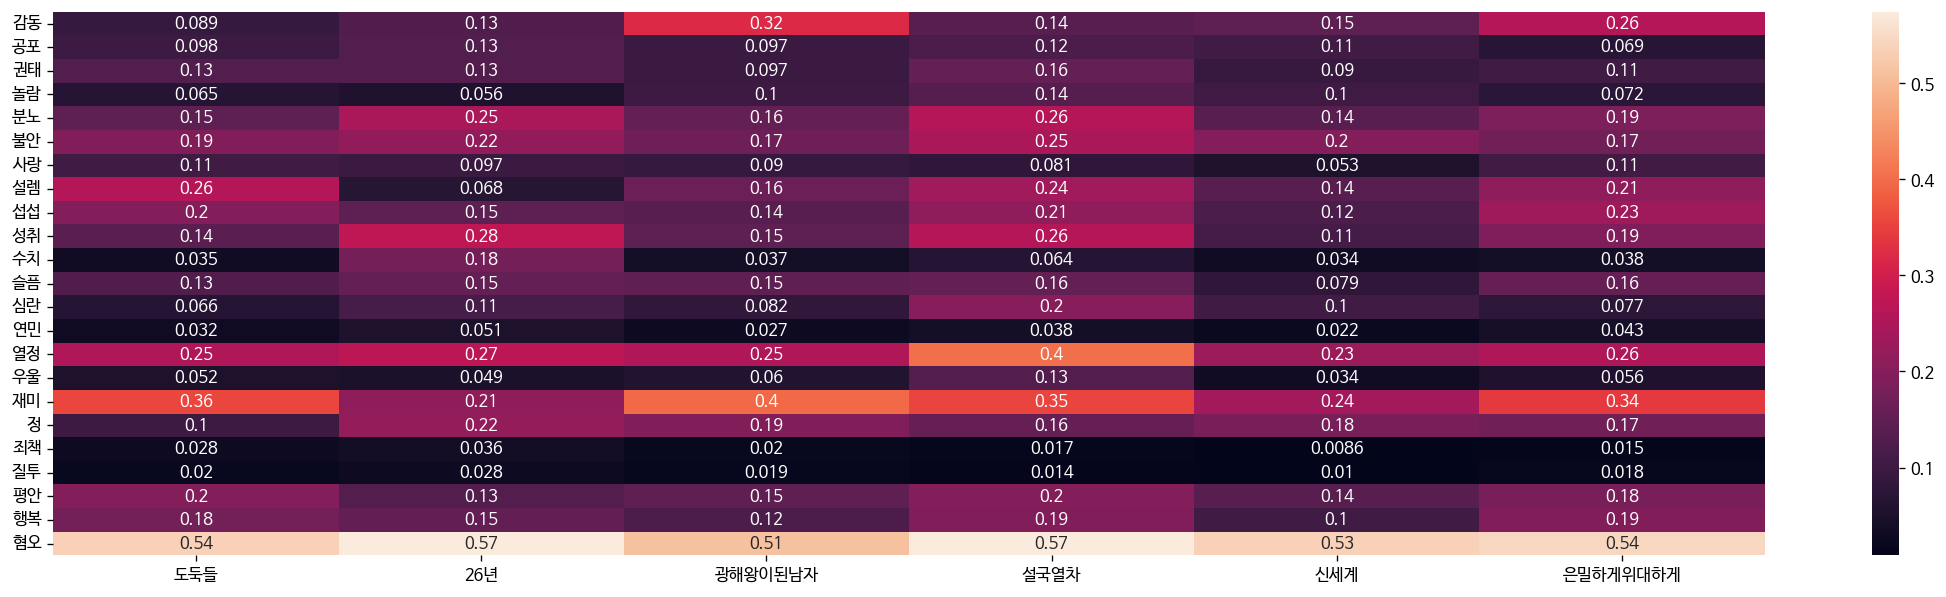

In [89]:
#히트맵로 표현하기
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.family':'NanumBarunGothic'})
# plt.rcParams.update({'font.family':'Malgun Gothic'})
plt.rcParams.update({'figure.dpi':'120'})
plt.rcParams.update({'figure.figsize':[6.5,6]})

plt.figure(figsize=(23, 6))
sns.heatmap(movieDF, annot=True)
plt.show()

# 8.네트워크 시각화 생성하기

In [42]:
!pip install pyvis

                                              0.0/756.0 kB ? eta -:--:--
     ------------                           256.0/756.0 kB 7.9 MB/s eta 0:00:01
     --------------------------             532.5/756.0 kB 6.7 MB/s eta 0:00:01
     -------------------------------------  747.5/756.0 kB 6.8 MB/s eta 0:00:01
     -------------------------------------- 756.0/756.0 kB 6.0 MB/s eta 0:00:00
                                              0.0/40.5 kB ? eta -:--:--
     ---------------------------------------- 40.5/40.5 kB ? eta 0:00:00
                                              0.0/2.1 MB ? eta -:--:--
     ---                                      0.2/2.1 MB 4.1 MB/s eta 0:00:01
     ---------                                0.5/2.1 MB 5.2 MB/s eta 0:00:01
     ---------------                          0.8/2.1 MB 5.4 MB/s eta 0:00:01
     --------------------                     1.1/2.1 MB 5.6 MB/s eta 0:00:01
     -------------------------                1.3/2.1 MB 6.0 MB/s eta 0:00:01
 

## 네트워크 데이터 만들기
- https://wikidocs.net/24603

## 코사인 유사도(Cosine Similarity)
- Dan Jurafsky: https://web.stanford.edu/~jurafsky/
- CS124(From Languages to Information): https://www.youtube.com/channel/UC_48v322owNVtORXuMeRmpA
- (2:30): https://www.youtube.com/watch?v=-_i9Cg81rXA&list=PLaZQkZp6WhWxIvz74aEvvVc99o7WuOoQ6&index=4

In [90]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(A, B):
    return dot(A, B)/(norm(A)*norm(B))

movies = ["도둑들","26년","광해왕이된남자","설국열차","신세계","은밀하게위대하게"]

sourceList = []
targetList = []
scoreList = []
for i in range(0,len(movies)):
    for j in range(0,len(movies)):
        source = np.array(list(movieDF.loc[:,movies[i]]))
        target = np.array(list(movieDF.loc[:,movies[j]]))
        score = cos_sim(source, target)
        if 0.95 <= score:
            if movies[i] != movies[j]:
                sourceList.append(movies[i])
                targetList.append(movies[j])
                scoreList.append(score)
            
movieNetwork = pd.DataFrame({'source':sourceList, 'target':targetList, 'score':scoreList})
movieNetwork.to_csv("./data/movieNetwork.csv")  
print(movieNetwork)

      source    target     score
0        도둑들      설국열차  0.969219
1        도둑들       신세계  0.963299
2        도둑들  은밀하게위대하게  0.974567
3        26년      설국열차  0.954324
4        26년       신세계  0.954576
5    광해왕이된남자       신세계  0.965345
6    광해왕이된남자  은밀하게위대하게  0.983854
7       설국열차       도둑들  0.969219
8       설국열차       26년  0.954324
9       설국열차       신세계  0.963917
10      설국열차  은밀하게위대하게  0.966536
11       신세계       도둑들  0.963299
12       신세계       26년  0.954576
13       신세계   광해왕이된남자  0.965345
14       신세계      설국열차  0.963917
15       신세계  은밀하게위대하게  0.968000
16  은밀하게위대하게       도둑들  0.974567
17  은밀하게위대하게   광해왕이된남자  0.983854
18  은밀하게위대하게      설국열차  0.966536
19  은밀하게위대하게       신세계  0.968000


In [91]:
#선택과 필터 적용하기
from pyvis.network import Network

net = Network(notebook=True, cdn_resources="remote", bgcolor="#151417", font_color="#F0EDF6", width="100%", select_menu=True, filter_menu=True)

#각 열의 데이터를 숫자 나열로 변환 ex) 2839 2309 0 2088 1319 1741 3460 1029 3332
nodes = list(set([*movieNetwork.source, *movieNetwork.target]))
#텍스트파일에 존재하는 관계 데이터를 중첩 리스트 형태로 변환 ex) [[2839, 3064], [2309, 2590]]
edges = movieNetwork.values.tolist()

net.add_nodes(nodes)
net.add_edges(edges)
net.show("movieNetwork.html")

movieNetwork.html
